## Exploratory Data Analysis of IMDb dataset
* Data sets found at https://datasets.imdbws.com/
* Description of datasets found here imdb.com/interfaces


In [21]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt 

## Statistics for titles.ratings.tsv


Sample of titles.ratings.tsv dataset: 

 <bound method NDFrame.head of             tconst  averageRating  numVotes
0        tt0000001            5.7      1913
1        tt0000002            5.8       258
2        tt0000003            6.5      1719
3        tt0000004            5.6       170
4        tt0000005            6.2      2534
...            ...            ...       ...
1262415  tt9916690            6.5         6
1262416  tt9916720            5.3       260
1262417  tt9916730            8.4         6
1262418  tt9916766            6.8        21
1262419  tt9916778            7.2        35

[1262420 rows x 3 columns]>

Statistics for titles.ratings.tsv: 

       averageRating    numVotes
count    1262420.00  1262420.00
mean           6.91     1018.32
std            1.39    17054.37
min            1.00        5.00
25%            6.20       11.00
50%            7.10       25.00
75%            7.90       97.00
max           10.00  2644764.00


<Figure size 864x432 with 0 Axes>

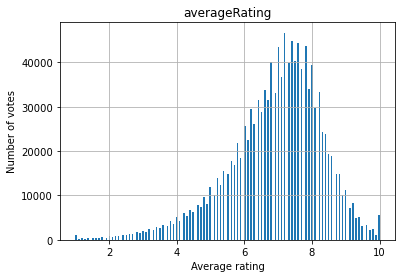

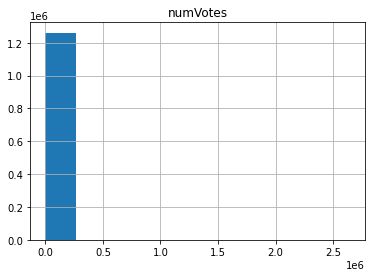

mode is:     averageRating  numVotes
0            7.2         7 


mean is:  averageRating       6.913012
numVotes         1018.315841
dtype: float64 




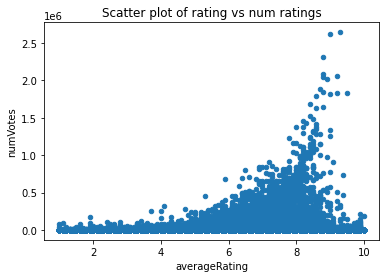

In [7]:
df = pd.read_csv('titles.ratings.tsv', sep='\t')

print("\nSample of titles.ratings.tsv dataset: \n\n", df.head)


# This shows percentiles, mean, sd, min, max and format to show 2 dec places
print("\nStatistics for titles.ratings.tsv: \n\n", df.describe().apply(lambda s: s.apply('{0:.2f}'.format)))

# This shows no missing values
#print("df.insnull().sum() : ", df.isnull().sum())

#print("df.memory_usage() : ", df.memory_usage())


# Create basic histogram
fig = plt.figure(figsize=(12, 6))
df.hist(column='averageRating', bins=200)
plt.xlabel('Average rating')
plt.ylabel('Number of votes')
plt.show()

# trying to plot numVotes as a histogram doesn't really show well. --> FIX THIS!
df.hist(column='numVotes')
plt.show()

# find mode of averageRating
print("mode is: ", df.mode(numeric_only=True), "\n\n")

# find mean of averageRating
print("mean is: ", df.mean(numeric_only=True), "\n\n")

# find top 20 movies by num of ratings
df.nlargest(20, 'numVotes')

# Scatter plot of averageRating vs numVotes
df.plot(title="Scatter plot of rating vs num ratings", kind='scatter', x ='averageRating', y='numVotes')
plt.show()


## Statistics for names.basics.tsv


Sample of names.basics.tsv dataset: 

 <bound method NDFrame.head of            nconst         primaryName birthYear deathYear  \
0       nm0000001        Fred Astaire      1899      1987   
1       nm0000002       Lauren Bacall      1924      2014   
2       nm0000003     Brigitte Bardot      1934        \N   
3       nm0000004        John Belushi      1949      1982   
4       nm0000005      Ingmar Bergman      1918      2007   
...           ...                 ...       ...       ...   
133768  nm0140582    Marty Carrington        \N        \N   
133769  nm0140583  Michael Carrington        \N        \N   
133770  nm0140584   Murray Carrington      1885      1941   
133771  nm0140585    Nigel Carrington        \N        \N   
133772  nm0140586  Phyllis Carrington        \N        \N   

                           primaryProfession  \
0             soundtrack,actor,miscellaneous   
1                         actress,soundtrack   
2        actress,soundtrack,music_department   
3    

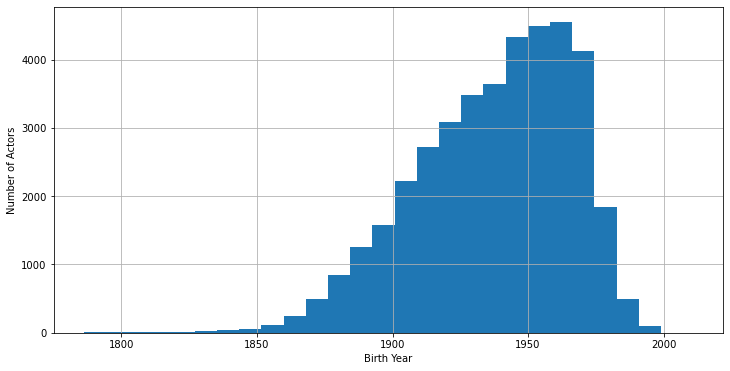

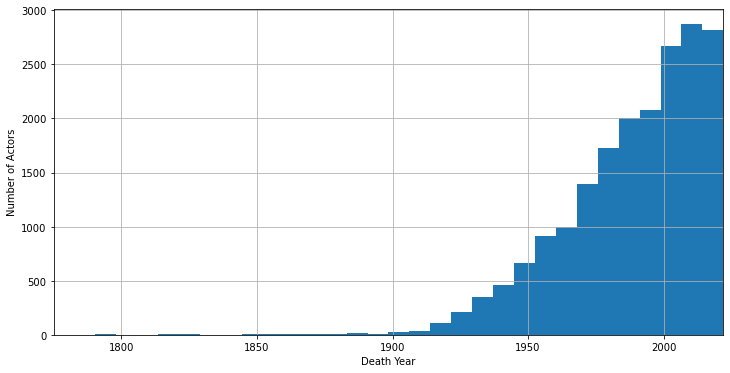

In [8]:
df1 = pd.read_csv('names.basics.tsv', sep='\t')

print("\nSample of names.basics.tsv dataset: \n\n", df1.head)

print("\nStatistics for titles.ratings.tsv: \n\n", df1.describe())

# drop rows where birthYear is /N
df1.drop(df1[df1['birthYear'] == r'\N'].index, inplace = True)
# convert birthYear column from type object to type numeric
df2 = pd.to_numeric(df1['birthYear'])
# Make histogram of actor birthYear
fig = plt.figure(figsize=(12, 6))
df2.hist(bins=100)
plt.xlabel('Birth Year')
plt.ylabel('Number of Actors')
plt.xlim([1775, 2022])
plt.show()


# drop rows where deathYear is /N
df1.drop(df1[df1['deathYear'] == r'\N'].index, inplace = True)
# convert birthYear column from type object to type numeric
df2 = pd.to_numeric(df1['deathYear'])
# Make histogram of actor deathYear
fig = plt.figure(figsize=(12, 6))
df2.hist(bins=100)
plt.xlabel('Death Year')
plt.ylabel('Number of Actors')
plt.xlim([1775, 2022])
plt.show()

## Statistics for title.basics.tsv


Sample of title.basics.tsv dataset: 

 <bound method NDFrame.head of            tconst titleType            primaryTitle           originalTitle  \
0       tt0000001     short              Carmencita              Carmencita   
1       tt0000002     short  Le clown et ses chiens  Le clown et ses chiens   
2       tt0000003     short          Pauvre Pierrot          Pauvre Pierrot   
3       tt0000004     short             Un bon bock             Un bon bock   
4       tt0000005     short        Blacksmith Scene        Blacksmith Scene   
...           ...       ...                     ...                     ...   
239928  tt0250534     movie      Invitation of Lust             Kushi no hi   
239929  tt0250535     movie     Love in the Pacific     Love in the Pacific   
239930  tt0250538     movie            Love: My Way            Love: My Way   
239931  tt0250539     movie          The Lovemakers          The Lovemakers   
239932  tt0250540     movie   Lovers by Appointment       Lov

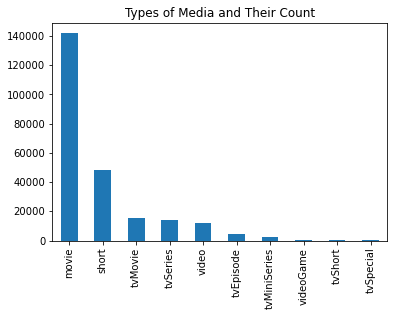

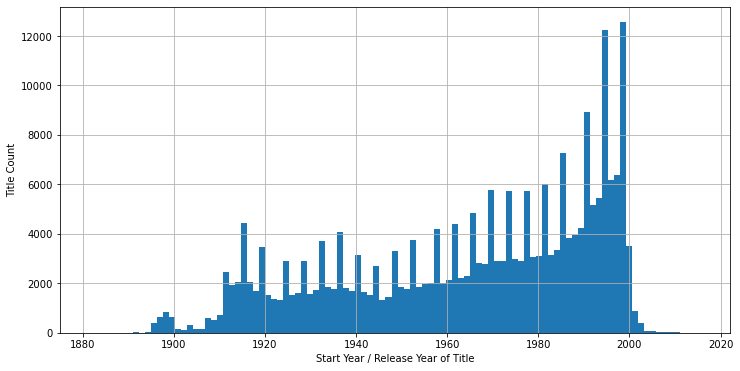

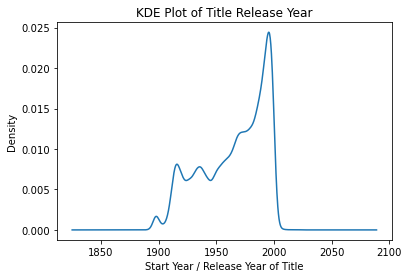

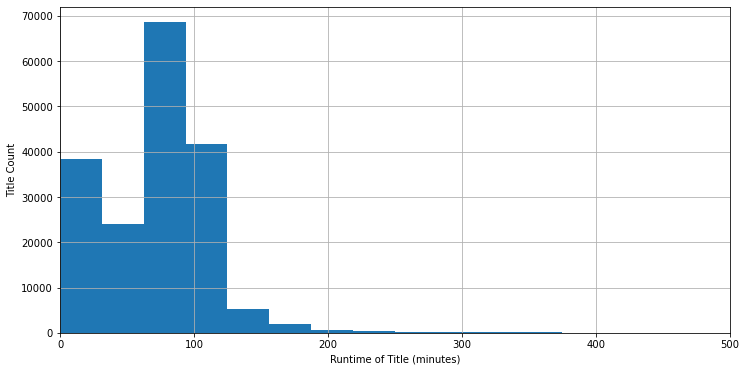

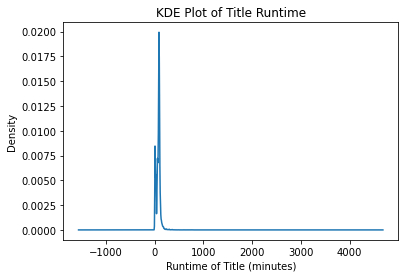


Statistics for titleruntime: 

 count    181680.000000
mean         74.137517
std          46.069468
min           0.000000
25%          50.000000
50%          82.000000
75%          95.000000
max        3122.000000
Name: runtimeMinutes, dtype: float64


In [10]:
# show dataset size, do a pie chart on the media types, 
# do a kde plot on movie year, etc. 
df = pd.read_csv('title.basics.tsv', sep='\t')

print("\nSample of title.basics.tsv dataset: \n\n", df.head)

print("\nStatistics for titles.basics.tsv: \n\n", df1.describe())

# Piechart is commented out because it looks bad. Use barchart below
#df['titleType'].value_counts().plot(ax=ax, kind='pie')

fig, ax = plt.subplots()
df['titleType'].value_counts().plot(title='Types of Media and Their Count',ax=ax, kind='bar')


# Prep startYear column to make a histogram and a KDE plot
# drop rows where startYear is /N
df.drop(df[df['startYear'] == r'\N'].index, inplace = True)
# convert startYear column from type object to type numeric. df1 is 1 column.
df1 = pd.to_numeric(df['startYear'])
# Make histogram of startYear
fig = plt.figure(figsize=(12, 6))
df1.hist(bins=100)
plt.xlabel('Start Year / Release Year of Title')
plt.ylabel('Title Count')
plt.xlim([1875, 2022])
plt.show()

# KDE plot of release year of a title
df1.plot.kde(title='KDE Plot of Title Release Year')
plt.xlabel('Start Year / Release Year of Title')
plt.show()


# Prep runtimeMinutes column to make a histogram and a KDE plot
# drop rows where runtimeMinutes is /N
df.drop(df[df['runtimeMinutes'] == r'\N'].index, inplace = True)
# convert runtimeMinutes column from type object to type numeric. df2 is 1 column.
df2 = pd.to_numeric(df['runtimeMinutes'])
# Make histogram of runtimeMinutes
fig = plt.figure(figsize=(12, 6))
df2.hist(bins=100)
plt.xlabel('Runtime of Title (minutes)')
plt.ylabel('Title Count')
plt.xlim([0, 500])
plt.show()

# KDE plot of title runtime
df2.plot.kde(title='KDE Plot of Title Runtime')
plt.xlabel('Runtime of Title (minutes)')
plt.show()

print("\nStatistics for titleruntime: \n\n", df2.describe())

##  Correlation Between Year and Rating, and Genre and Rating:


Head of title.basics.tsv and titles.ratings.tsv after merging based on titles: 

 <bound method NDFrame.head of            tconst  averageRating  numVotes titleType  \
0       tt0000001            5.7      1913     short   
1       tt0000002            5.8       258     short   
2       tt0000003            6.5      1719     short   
3       tt0000004            5.6       170     short   
4       tt0000005            6.2      2534     short   
...           ...            ...       ...       ...   
154356  tt0250517            4.0       154     movie   
154357  tt0250518            6.3        78     video   
154358  tt0250522            5.2        22     movie   
154359  tt0250524            6.1        62     movie   
154360  tt0250534            6.4        17     movie   

                      primaryTitle               originalTitle  isAdult  \
0                       Carmencita                  Carmencita      0.0   
1           Le clown et ses chiens      Le clown et ses chiens  

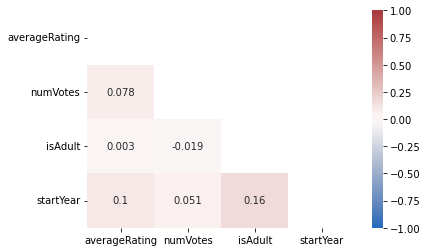

In [26]:
# and re-read in titles.ratings.tsv
df6 = pd.read_csv('titles.ratings.tsv', sep='\t')

# merge didn't work as planned, so re-read in title.basics.tsv
df7 = pd.read_csv('title.basics.tsv', sep='\t')

# Merge title.basics.tsv (df3) and titles.ratings.tsv (df) based off titles column.
mergedDF = pd.merge(df6, df7, on='tconst')

# Drop rows where startYear is empty
mergedDF.drop(mergedDF[mergedDF['startYear'] == r'\N'].index, inplace = True)

# convert startYear column from type object to type numeric
mergedDF['startYear'] = pd.to_numeric(mergedDF['startYear'])

# convert averageRating column from type object to type numeric
mergedDF['averageRating'] = pd.to_numeric(mergedDF['averageRating'])

# Print some of the dataframe to make sure it looks right
print("\nHead of title.basics.tsv and titles.ratings.tsv after merging based on titles: \n\n", mergedDF.head)

# Print basic correlation matrix
matrix = mergedDF.corr(method='pearson', min_periods=1).round(3)
print("\nBasic Correlation Matrix\n", matrix)

print("\nSeaBorn Correlation Matrix as Heatmap\n")
# These 3 lines taken from https://datagy.io/python-correlation-matrix/ on 11/26/2022
mask = np.triu(np.ones_like(matrix, dtype=bool))
sns.heatmap(matrix, annot=True, vmax=1, vmin=-1, center=0, cmap='vlag', mask=mask)
plt.show()
